## **Regresión Lineal: Coste de un incidente de seguridad**
En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

### **Enunciado del ejercicio**
El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatorio.

### **1. Generación del conjunto de datos**

In [ ]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


###**2. Visualización del conjunto de datos**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

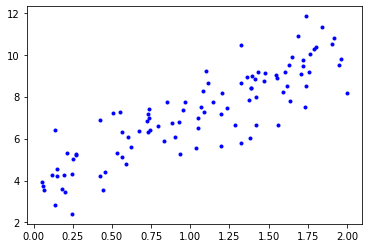

In [ ]:
plt.plot(X, y, "b.")
plt.show()

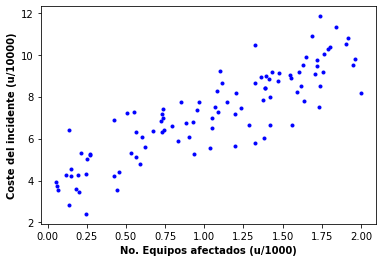

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("No. Equipos afectados (u/1000)", fontdict=dict(weight='bold'))
plt.ylabel("Coste del incidente (u/10000)", fontdict=dict(weight='bold'))
plt.show()

###**3. Modificación del conjunto de datos**

In [ ]:
import pandas as pd

In [ ]:
# .flatten() -> Regresa un arreglo de una dimensión con los datos
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.152399,4.219440
1,0.561473,5.102992
2,0.532090,5.332402
3,1.391379,8.963525
4,1.420798,6.644954
5,0.271722,5.241445
6,0.734185,7.416916
7,1.709539,9.072778
8,1.606700,9.170220
9,1.740989,8.520493


In [ ]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,152,42194
1,561,51029
2,532,53324
3,1391,89635
4,1420,66449
5,271,52414
6,734,74169
7,1709,90727
8,1606,91702
9,1740,85204


In [ ]:
# Ordenar dataframe
#df.sort_values('n_equipos_afectados')

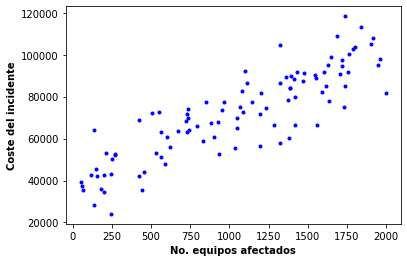

In [ ]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("No. equipos afectados", fontdict=dict(weight='bold'))
plt.ylabel("Coste del incidente", fontdict=dict(weight='bold'))
plt.show()

###**4. Construcción del modelo**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
# Ajustar - Entrenar
# (Variables de entrada, Variables de salida)
# Arreglo, Arreglo
lin_reg.fit( df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values )

LinearRegression()

In [ ]:
# Parámetro theta 0 (Corte eje Y)
lin_reg.intercept_

38378.25535270638

In [ ]:
# Parámetro theta 1 (Pendiente)
lin_reg.coef_

array([32.10945462])

In [ ]:
# Función de la recta de regresión lineal
# y = lin_reg.coef_ * x + lin_reg.intercept_

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

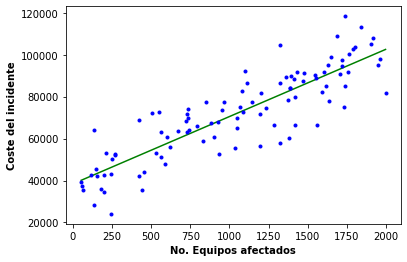

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel("No. Equipos afectados", fontdict=dict(weight='bold'))
plt.ylabel("Coste del incidente", fontdict=dict(weight='bold'))
plt.show()

### **5. Predicción de nuevos ejemplos**

In [ ]:
x_new = np.array([[1200]]) # 1200 equipos afectados

#Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 76909 €


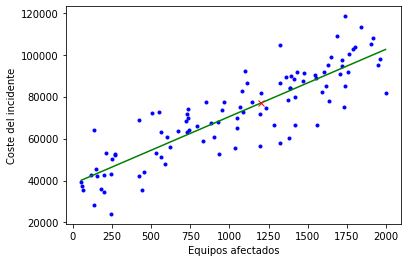

In [ ]:
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()